# Video games sales data analysis 1
Analysis of the dataset from https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings
It contains historical sales for game publishers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
games = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
games.head(20)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


### Pivot Tables
1. Create pivot table with 3 different methods
2. Create dataframe that contains best selling titles and sales numbers for each publisher
3. Plot data

In [2]:
# Clean df
df=pd.concat([games['Publisher'], games['NA_Sales'], games['EU_Sales'], games['JP_Sales']], axis=1)
#drop wii sports because it was sold if console in NA and EU
df.drop(0, inplace=True)
df

,Publisher,NA_Sales,EU_Sales,JP_Sales
1,Nintendo,29.08,3.58,6.81
2,Nintendo,15.68,12.76,3.79
3,Nintendo,15.61,10.93,3.28
4,Nintendo,11.27,8.89,10.22
5,Nintendo,23.20,2.26,4.22
6,Nintendo,11.28,9.14,6.50
7,Nintendo,13.96,9.18,2.93
8,Nintendo,14.44,6.94,4.70
9,Nintendo,26.93,0.63,0.28
10,Nintendo,9.05,10.95,1.93


In [3]:
#1 method- pivot table way
salespivot1=pd.pivot_table(df, index=df.Publisher, aggfunc=np.sum).sort_values('NA_Sales', ascending=False)
salespivot1=salespivot1.iloc[:10]
column_order=['NA_Sales','EU_Sales', 'JP_Sales']
salespivot1= salespivot1.reindex_axis(column_order, axis=1)
salespivot1

,NA_Sales,EU_Sales,JP_Sales
Publisher,,,
Nintendo,775.61,390.05,454.38
Electronic Arts,599.50,373.91,14.35
Activision,432.59,215.90,6.71
Sony Computer Entertainment,266.17,186.56,74.15
Ubisoft,252.74,161.99,7.52
Take-Two Interactive,222.94,119.25,5.93
THQ,207.72,93.78,5.01
Microsoft Game Studios,157.43,68.64,3.30
Atari,109.84,27.00,10.71


In [4]:
#2 method- gropuby
salespivot2=df.groupby('Publisher').sum().sort_values(by='NA_Sales', ascending=False)
salespivot2

,NA_Sales,EU_Sales,JP_Sales
Publisher,,,
Nintendo,775.61,390.05,454.38
Electronic Arts,599.50,373.91,14.35
Activision,432.59,215.90,6.71
Sony Computer Entertainment,266.17,186.56,74.15
Ubisoft,252.74,161.99,7.52
Take-Two Interactive,222.94,119.25,5.93
THQ,207.72,93.78,5.01
Microsoft Game Studios,157.43,68.64,3.30
Atari,109.84,27.00,10.71


In [5]:
#3 method- crosstab
#in order to use crosstab, which works a bit differently to groupby and pivottable I have to 'melt'
# the dataframe so that its longer but has columns assinged more directly to eachother
idx = ["Publisher"]
d = pd.melt(df, id_vars=idx)
salespivot3=pd.crosstab(d.Publisher, d.variable, d.value, aggfunc="sum", rownames=idx, colnames=[None])
salespivot3

,EU_Sales,JP_Sales,NA_Sales
Publisher,,,
10TACLE Studios,0.04,0.00,0.07
1C Company,0.07,0.00,0.01
20th Century Fox Video Games,0.10,0.00,1.82
2D Boy,0.03,0.00,0.00
3DO,3.04,0.00,6.48
49Games,0.03,0.00,0.00
505 Games,16.19,2.05,31.63
5pb,0.00,1.64,0.02
7G//AMES,0.05,0.00,0.00


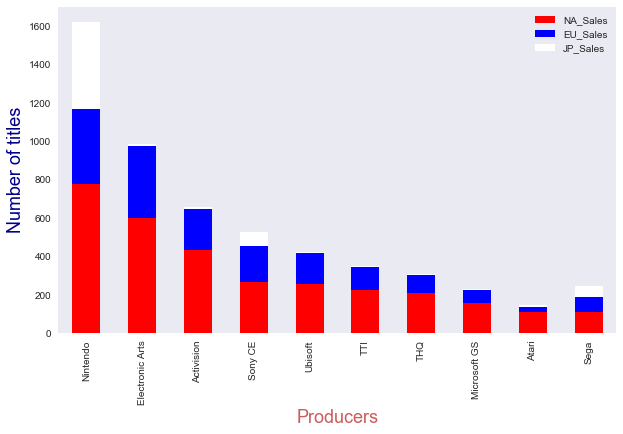

In [6]:
clr=['red','blue', 'white']
ax = salespivot1.plot(kind='bar', stacked=True, grid=False, figsize=(10,6),color=clr)
ax.set_ylabel('Number of titles', size=18, color='darkblue')
ax.set_xlabel('Producers', size=18, color='indianred')
#changing specific labels from the plot
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[3] = 'Sony CE'
labels[5] = 'TTI'
labels[7] = 'Microsoft GS'
ax.set_xticklabels(labels);
#do the proper visualisation

### Best-selling games
Show which game titles are best selling for each publisher

In [7]:
#drop wii sports and kinect adventures because those were mostly bundled titles 
games=games.drop(14)
games=games.drop(0)
grouped=games.groupby(['Publisher'], sort=False)['Global_Sales'].max()
grouped.sort_index(ascending=False)
grouped

Publisher
Nintendo                                  40.24
Take-Two Interactive                      21.04
Sony Computer Entertainment               14.98
Activision                                14.73
Microsoft Game Studios                    12.12
Ubisoft                                   10.12
Bethesda Softworks                         8.79
Electronic Arts                            8.57
Sega                                       7.99
SquareSoft                                 7.86
Atari                                      7.81
505 Games                                  6.71
Capcom                                     6.30
GT Interactive                             6.27
Konami Digital Entertainment               6.05
Square Enix                                5.95
Sony Computer Entertainment Europe         5.87
Virgin Interactive                         5.82
LucasArts                                  5.64
Warner Bros. Interactive Entertainment     5.48
Universal Interactive         

In [8]:
#sort dataframe so that it is sorted by maximum value of Global_Sales per publisher and then sorted from highest to 
#minimum for that value
df1=games.loc[games.groupby('Publisher')['Global_Sales'].idxmax()].sort_values('Global_Sales', ascending=False)
df=pd.concat([df1.Name,df1.Publisher,df1.Global_Sales], axis=1)
best=df[:10]
best

,Name,Publisher,Global_Sales
1,Super Mario Bros.,Nintendo,40.24
16,Grand Theft Auto V,Take-Two Interactive,21.04
28,Gran Turismo 3: A-Spec,Sony Computer Entertainment,14.98
29,Call of Duty: Modern Warfare 3,Activision,14.73
44,Halo 3,Microsoft Game Studios,12.12
61,Just Dance 3,Ubisoft,10.12
75,The Elder Scrolls V: Skyrim,Bethesda Softworks,8.79
77,FIFA 16,Electronic Arts,8.57
86,Mario & Sonic at the Olympic Games,Sega,7.99
88,Final Fantasy VIII,SquareSoft,7.86


Text(0,0.5,'Copies sold')

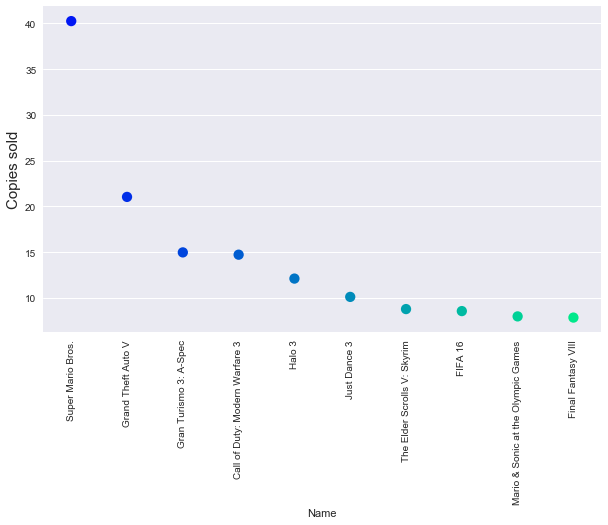

In [9]:
#Simple pointplot
plt.figure(figsize=(10, 6))
ax=sns.pointplot(y=best.Global_Sales, x=best.Name, palette='winter', join=True, linestyles='-',scale = 1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_ylabel('Copies sold', size=15)

### Customized piechart
Customized piechart for games sold.

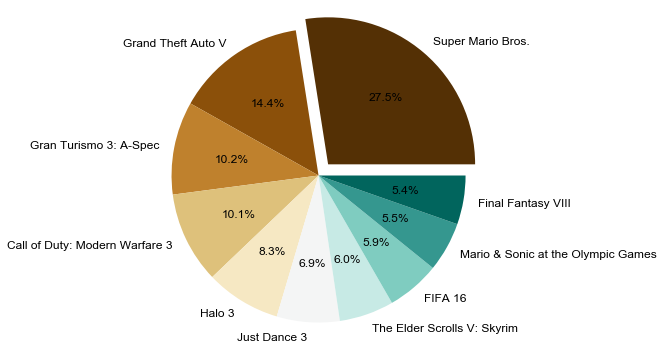

In [10]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 12
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
# explode 1st slice
explode=(0.1, 0, 0, 0,0, 0, 0,0, 0, 0)
from matplotlib import cm
cs=cm.BrBG(np.arange(10)/10.)
patches, texts, autotexts = ax.pie(best.Global_Sales, explode=explode, labels=best.Name, colors=cs, autopct='%1.1f%%')
for i in range(10):
    texts[i].set_fontsize(12)
#plt.pie(best.Global_Sales, labels=best.Name, autopct='%1.1f%%', startangle=140, colors=cs)



plt.axis('equal');